In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import tensorflow as tf
import random


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
with open("/content/drive/My Drive/Colab Notebooks/Traffic Signal CNN/test.p",mode="rb") as test_data:
  test=pickle.load(test_data)
with open("/content/drive/My Drive/Colab Notebooks/Traffic Signal CNN/train.p", mode="rb") as train_data:
  train=pickle.load(train_data)
with open("/content/drive/My Drive/Colab Notebooks/Traffic Signal CNN/valid.p", mode="rb") as valid_data:
  valid=pickle.load(valid_data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train,y_train=train['features'],train['labels']
x_test,y_test=test['features'],test['labels']
x_valid,y_valid=valid['features'],valid['labels']

In [ ]:
x_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [ ]:
x_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

In [ ]:
x_valid.shape, y_valid.shape

((4410, 32, 32, 3), (4410,))

In [ ]:
x_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

17

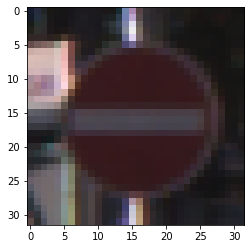

In [ ]:
i=random.randint(1,len(x_train))
plt.imshow(x_train[i])
y_train[i]

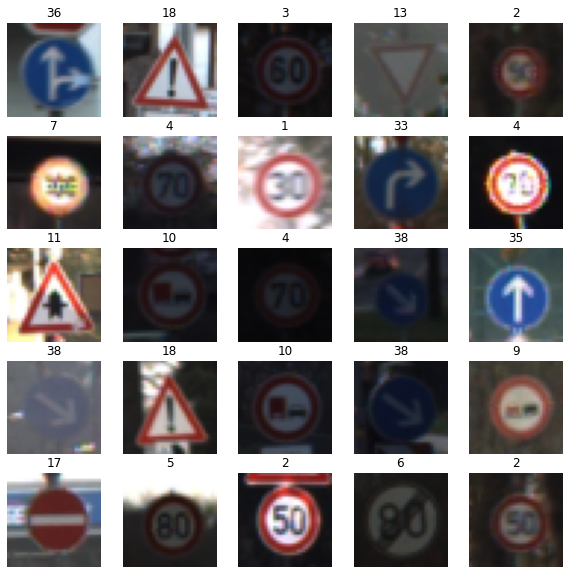

In [ ]:
w_grid=5
l_grid=5
fig, axes=plt.subplots(w_grid,l_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(x_train)
for i in range(0, w_grid*l_grid):
  index=np.random.randint(n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis("off")

In [ ]:
### Convert Images to gray scale

In [ ]:
from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train,y_train)

In [ ]:
x_train_gray=np.sum(x_train/3, axis=3,keepdims=3)

In [ ]:
x_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
x_valid_gray=np.sum(x_valid/3, axis=3,keepdims=3)

In [ ]:
x_valid_gray.shape

(4410, 32, 32, 1)

In [ ]:
x_test_gray=np.sum(x_test/3, axis=3, keepdims=3)

In [ ]:
x_test_gray[0]

array([[[143.        ],
        [141.33333333],
        [142.66666667],
        ...,
        [118.33333333],
        [121.66666667],
        [106.66666667]],

       [[144.33333333],
        [143.        ],
        [144.33333333],
        ...,
        [146.        ],
        [144.66666667],
        [143.33333333]],

       [[144.        ],
        [144.66666667],
        [142.        ],
        ...,
        [147.66666667],
        [148.33333333],
        [146.66666667]],

       ...,

       [[140.33333333],
        [137.66666667],
        [138.66666667],
        ...,
        [140.33333333],
        [140.        ],
        [143.        ]],

       [[139.33333333],
        [138.66666667],
        [136.66666667],
        ...,
        [138.33333333],
        [139.33333333],
        [140.33333333]],

       [[138.        ],
        [136.33333333],
        [139.66666667],
        ...,
        [140.        ],
        [140.66666667],
        [141.33333333]]])

In [ ]:
#x_train=x_train/255
#x_test=x_test/255
#x_valid=x_valid/255
x_train_norm=(x_train_gray-128)/128    
x_valid_norm=(x_valid_gray-128)/128
x_test_norm=(x_test_gray-128)/128

In [ ]:
from keras.utils import np_utils

In [ ]:
y_train=np_utils.to_categorical(y_train,num_classes=43)
y_test=np_utils.to_categorical(y_test,num_classes=43)
y_valid=np_utils.to_categorical(y_valid,num_classes=43)

In [ ]:
y_train.shape

(34799, 43)

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout
from keras.models import Sequential
from keras.layers import Flatten

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=50, kernel_size=(3,3),strides=(1,1),padding="same",activation='relu',input_shape=(32,32,1)))

In [ ]:
model.add(Conv2D(filters=75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(filters=125,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=500, activation='relu',))
model.add(Dense(units=250,activation='relu'))
model.add(Dense(units=43,activation='softmax'))

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 50)        500       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 75)        33825     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 75)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 125)       84500     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 125)         0

In [ ]:
model.fit(x_train_norm,y_train,batch_size=100,epochs=10,validation_data=(x_valid_norm,y_valid))

Epoch 1/10
348/348 [==============================] - 4s 12ms/step - loss: 0.9927 - accuracy: 0.7285 - val_loss: 0.2692 - val_accuracy: 0.9222
Epoch 2/10
348/348 [==============================] - 4s 11ms/step - loss: 0.0857 - accuracy: 0.9765 - val_loss: 0.2276 - val_accuracy: 0.9395
Epoch 3/10
348/348 [==============================] - 4s 11ms/step - loss: 0.0391 - accuracy: 0.9889 - val_loss: 0.2245 - val_accuracy: 0.9510
Epoch 4/10
348/348 [==============================] - 4s 11ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.2452 - val_accuracy: 0.9560
Epoch 5/10
348/348 [==============================] - 4s 11ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.2522 - val_accuracy: 0.9440
Epoch 6/10
348/348 [==============================] - 4s 11ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.1982 - val_accuracy: 0.9567
Epoch 7/10
348/348 [==============================] - 4s 11ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.2333 - val_accuracy: 0.9605

In [ ]:
y_predict=model.predict_classes(x_test_norm)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_predict

array([16,  1, 38, ...,  3,  7, 10])

In [ ]:
y_true=[np.argmax(i) for i in y_test]

In [ ]:
y_true=np.array(y_true)

In [ ]:
y_true

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
score=model.evaluate(x_test_norm,y_test)

395/395 [==============================] - 1s 3ms/step - loss: 0.2613 - accuracy: 0.9427


In [ ]:
from sklearn.metrics import confusion_matrix
cmt=confusion_matrix(y_true,y_predict)

In [ ]:
cmt

array([[ 57,   1,   0, ...,   0,   0,   0],
       [  0, 716,   1, ...,   0,   0,   0],
       [  0,   7, 742, ...,   0,   0,   0],
       ...,
       [  0,   1,   1, ...,  71,   0,   0],
       [  0,   0,   0, ...,   0,  36,   0],
       [  0,   0,   0, ...,   3,   1,  80]])

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(cmt,annot=True,)

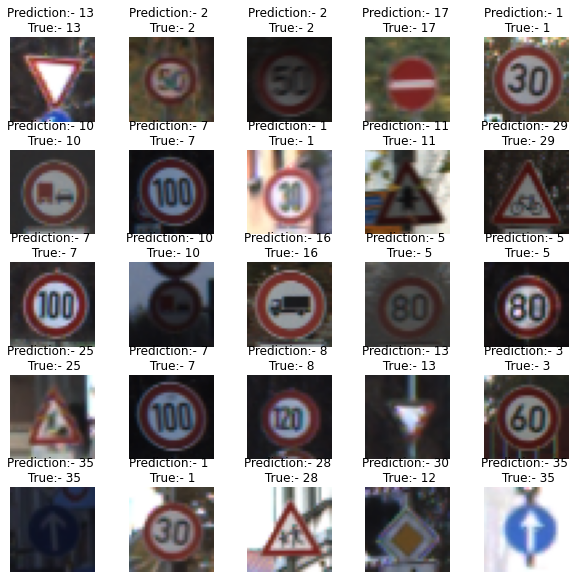

In [ ]:
l=5
w=5
fig, axes=plt.subplots(l,w,figsize=(10,10))
axes=axes.ravel()
n_test=len(x_test)
for i in range(0,l*w):
  index=np.random.randint(n_test)
  axes[i].imshow(x_test[index])
  axes[i].set_title("Prediction:- {} \n True:- {}".format(y_predict[index],y_true[index]))
  axes[i].axis("off")
plt.subplots_adjust(wspace=0.4)

In [ ]:
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing import image

In [ ]:
path="/content/drive/My Drive/Colab Notebooks/Traffic Signal CNN/1.png"

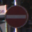

In [ ]:
img=load_img(path, target_size=(32,32))
img

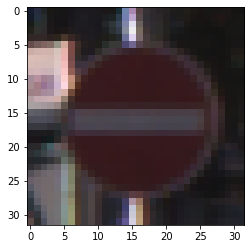

In [ ]:
plt.imshow(img)

In [ ]:
x=img_to_array(img, dtype=np.int)

In [ ]:
x

array([[[ 24,  28,  47],
        [ 38,  44,  62],
        [ 33,  36,  36],
        ...,
        [ 26,  23,  21],
        [ 22,  21,  20],
        [ 21,  20,  20]],

       [[ 22,  25,  38],
        [ 36,  48,  62],
        [ 39,  45,  46],
        ...,
        [ 25,  22,  21],
        [ 23,  22,  21],
        [ 24,  23,  21]],

       [[ 26,  28,  26],
        [ 41,  49,  48],
        [ 44,  46,  45],
        ...,
        [ 24,  22,  20],
        [ 24,  23,  22],
        [ 24,  24,  22]],

       ...,

       [[ 44,  52,  57],
        [ 65,  71,  81],
        [102, 100, 106],
        ...,
        [ 31,  32,  38],
        [ 31,  34,  40],
        [ 34,  36,  41]],

       [[ 65,  51,  56],
        [ 49,  53,  60],
        [ 90,  93, 103],
        ...,
        [ 29,  31,  37],
        [ 28,  31,  38],
        [ 30,  33,  40]],

       [[ 92,  74,  73],
        [ 45,  45,  44],
        [ 77,  79,  94],
        ...,
        [ 33,  35,  40],
        [ 33,  35,  40],
        [ 32,  35,  42]]

In [ ]:
x.shape

(32, 32, 3)

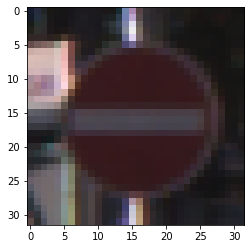

In [ ]:
plt.imshow(x)

In [ ]:
x.shape

(32, 32, 3)

In [ ]:
x

array([[[ 24,  28,  47],
        [ 38,  44,  62],
        [ 33,  36,  36],
        ...,
        [ 26,  23,  21],
        [ 22,  21,  20],
        [ 21,  20,  20]],

       [[ 22,  25,  38],
        [ 36,  48,  62],
        [ 39,  45,  46],
        ...,
        [ 25,  22,  21],
        [ 23,  22,  21],
        [ 24,  23,  21]],

       [[ 26,  28,  26],
        [ 41,  49,  48],
        [ 44,  46,  45],
        ...,
        [ 24,  22,  20],
        [ 24,  23,  22],
        [ 24,  24,  22]],

       ...,

       [[ 44,  52,  57],
        [ 65,  71,  81],
        [102, 100, 106],
        ...,
        [ 31,  32,  38],
        [ 31,  34,  40],
        [ 34,  36,  41]],

       [[ 65,  51,  56],
        [ 49,  53,  60],
        [ 90,  93, 103],
        ...,
        [ 29,  31,  37],
        [ 28,  31,  38],
        [ 30,  33,  40]],

       [[ 92,  74,  73],
        [ 45,  45,  44],
        [ 77,  79,  94],
        ...,
        [ 33,  35,  40],
        [ 33,  35,  40],
        [ 32,  35,  42]]

In [ ]:
x=np.expand_dims(x,axis=0,)
x_gray=np.sum(x/3, axis=3, keepdims=True)

In [ ]:
x_gray.shape

(1, 32, 32, 1)

In [ ]:
x_gray

array([[[[ 33.        ],
         [ 48.        ],
         [ 35.        ],
         ...,
         [ 23.33333333],
         [ 21.        ],
         [ 20.33333333]],

        [[ 28.33333333],
         [ 48.66666667],
         [ 43.33333333],
         ...,
         [ 22.66666667],
         [ 22.        ],
         [ 22.66666667]],

        [[ 26.66666667],
         [ 46.        ],
         [ 45.        ],
         ...,
         [ 22.        ],
         [ 23.        ],
         [ 23.33333333]],

        ...,

        [[ 51.        ],
         [ 72.33333333],
         [102.66666667],
         ...,
         [ 33.66666667],
         [ 35.        ],
         [ 37.        ]],

        [[ 57.33333333],
         [ 54.        ],
         [ 95.33333333],
         ...,
         [ 32.33333333],
         [ 32.33333333],
         [ 34.33333333]],

        [[ 79.66666667],
         [ 44.66666667],
         [ 83.33333333],
         ...,
         [ 36.        ],
         [ 36.        ],
         [ 36.333

In [ ]:
x_norm=x_gray/255.0

In [ ]:
x_norm

array([[[[0.12941176],
         [0.18823529],
         [0.1372549 ],
         ...,
         [0.09150327],
         [0.08235294],
         [0.07973856]],

        [[0.11111111],
         [0.19084967],
         [0.16993464],
         ...,
         [0.08888889],
         [0.08627451],
         [0.08888889]],

        [[0.10457516],
         [0.18039216],
         [0.17647059],
         ...,
         [0.08627451],
         [0.09019608],
         [0.09150327]],

        ...,

        [[0.2       ],
         [0.28366013],
         [0.40261438],
         ...,
         [0.13202614],
         [0.1372549 ],
         [0.14509804]],

        [[0.2248366 ],
         [0.21176471],
         [0.37385621],
         ...,
         [0.12679739],
         [0.12679739],
         [0.13464052]],

        [[0.3124183 ],
         [0.1751634 ],
         [0.32679739],
         ...,
         [0.14117647],
         [0.14117647],
         [0.14248366]]]])

In [ ]:
x_norm.shape

(1, 32, 32, 1)

In [ ]:
model.predict_classes(x_norm)

array([17])

In [ ]:
image_test=image_generator.flow_from_directory("/content/drive/My Drive/Colab Notebooks/Test",target_size=(224,224),shuffle=False)